In [1]:
import pandas as pd
import numpy as np

# Dataset

Cargando el dataset:

In [5]:
data = pd.read_csv('d:\\cursos\\data_science\\data\\utilidades.csv')
# data = pd.read_csv('ventas.csv')
data

,Cantidad,Fecha,Producto,Venta,Compra,Utilidad
0,NaN,21/02/2024,NaN,57.0,49.90,7.10
1,1.0,NaN,Ariel Oxianillos De 500gm,28.0,25.93,2.07
2,1.0,NaN,Axion 720gr,29.0,23.97,5.03
3,NaN,21/02/2024,NaN,53.0,43.79,9.21
4,1.0,NaN,Whiskas 1kg,53.0,43.79,9.21
...,...,...,...,...,...,...
63118,1.0,NaN,HUEVO CRIO 1/2 CONO,38.0,32.16,5.84
63119,NaN,30/07/2024,NaN,42.0,41.02,0.98
63120,2.0,NaN,Azucar 1 Kg,42.0,41.02,0.98
63121,NaN,30/07/2024,NaN,18.0,11.10,6.90


Proceso para rellenar valores NaN según la fecha relativa:

In [6]:
values = data.Fecha.unique()

In [7]:
intervals = np.zeros(len(values), dtype='int64')
values = np.delete(values, 1)

In [8]:
for i in range(len(values)):
    intervals[i] = data[data.Fecha == values[i]].index.min()

In [9]:
intervals[-1] = data.index.max()

In [11]:
i = 0
for b in range(1,len(intervals[1:])+1):
    a = b - 1
    data.loc[intervals[a]:intervals[b],'Fecha'] = data.loc[intervals[a]:intervals[b],'Fecha'].fillna(values[i])
    i += 1

Cambiar formato de fecha a legible por Pandas y cambiando formato de Importe a numérico:

In [12]:
data.Fecha = pd.to_datetime(data.Fecha, format='%d/%m/%Y')

Añadiendo columna para día:

In [13]:
data['Dia'] = np.nan

In [14]:
i = 0
for j in values:
    data.loc[data.Fecha == j, 'Dia'] = i
    i += 1

Añadiendo columna con el nombre del día de la semana:

In [15]:
from datetime import datetime
data['DiaSemana'] = data['Fecha'].apply(lambda fecha: fecha.strftime('%A'))

Reorganizar columnas:

In [17]:
data = data.reindex(columns=['Dia', 'Fecha', 'DiaSemana', 'Cantidad', 'Producto', 'Venta','Compra','Utilidad'])

In [18]:
data

,Dia,Fecha,DiaSemana,Cantidad,Producto,Venta,Compra,Utilidad
0,0.0,2024-02-21,Wednesday,NaN,NaN,57.0,49.90,7.10
1,0.0,2024-02-21,Wednesday,1.0,Ariel Oxianillos De 500gm,28.0,25.93,2.07
2,0.0,2024-02-21,Wednesday,1.0,Axion 720gr,29.0,23.97,5.03
3,0.0,2024-02-21,Wednesday,NaN,NaN,53.0,43.79,9.21
4,0.0,2024-02-21,Wednesday,1.0,Whiskas 1kg,53.0,43.79,9.21
...,...,...,...,...,...,...,...,...
63118,160.0,2024-07-30,Tuesday,1.0,HUEVO CRIO 1/2 CONO,38.0,32.16,5.84
63119,160.0,2024-07-30,Tuesday,NaN,NaN,42.0,41.02,0.98
63120,160.0,2024-07-30,Tuesday,2.0,Azucar 1 Kg,42.0,41.02,0.98
63121,160.0,2024-07-30,Tuesday,NaN,NaN,18.0,11.10,6.90


# Análisis exploratorio

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [20]:
ventas = data.copy()
ventas.dropna(subset=['Producto'], inplace=True)
ventas = ventas.groupby(['Dia', 'Fecha', 'DiaSemana', 'Producto'])[['Cantidad', 'Venta','Compra','Utilidad']].sum().reset_index()

In [21]:
ventas

,Dia,Fecha,DiaSemana,Producto,Cantidad,Venta,Compra,Utilidad
0,0.0,2024-02-21,Wednesday,Abono Clientes Pay Joy,198.0,198.0,194.04,3.96
1,0.0,2024-02-21,Wednesday,Aceite Purela Soya 800ml,1.0,36.0,29.66,6.34
2,0.0,2024-02-21,Wednesday,Activia Ciruela Pasa 250g,1.0,16.0,14.13,1.87
3,0.0,2024-02-21,Wednesday,Agua Ciel 1.5 Lts 4721,1.0,16.0,12.04,3.96
4,0.0,2024-02-21,Wednesday,Ajo 1pza,1.0,7.0,3.60,3.40
...,...,...,...,...,...,...,...,...
18086,160.0,2024-07-30,Tuesday,Whiskas 1kg,1.0,53.0,40.68,12.32
18087,160.0,2024-07-30,Tuesday,Yoghurt Licuado Manzana Y Granola 470g 9422,1.0,26.0,21.00,5.00
18088,160.0,2024-07-30,Tuesday,Yoghurt Yoplait Fresa 220g 9140,1.0,15.0,5.17,9.83
18089,160.0,2024-07-30,Tuesday,Yoghurt Yoplait Fresa 330g 9112,1.0,19.0,15.00,4.00


In [29]:
k = ventas.loc[(ventas.Producto == 'COCA RETORNABLE 3LTS PAQ 6PZA')
#               (ventas.Producto == 'COCA COLA 2.5LT RET PAQ 8PZ') |
#               (ventas.Producto == 'Coca Retornable 3LTS 3068') |
#               (ventas.Producto == 'Coca Retornable 2.5 Lts') |
#               (ventas.Producto == 'Pepsi Jumbo 3Lt') |
#               (ventas.Producto == 'PEPSI 3LTS PAQ 8PZ')
#               (ventas.Producto == 'HUEVO CRIO 1/2 CONO') |
#               (ventas.Producto == 'HUEVO CRIO CONO 30PZ') |
#               (ventas.Producto == 'Huevo Crio Individual 1pza')
              ]
k

,Dia,Fecha,DiaSemana,Producto,Cantidad,Venta,Compra,Utilidad
24,0.0,2024-02-21,Wednesday,COCA RETORNABLE 3LTS PAQ 6PZA,4.0,788.0,744.92,43.08
175,1.0,2024-02-22,Thursday,COCA RETORNABLE 3LTS PAQ 6PZA,7.0,1379.0,1303.61,75.39
325,2.0,2024-02-23,Friday,COCA RETORNABLE 3LTS PAQ 6PZA,8.0,1576.0,1489.84,86.16
504,3.0,2024-02-24,Saturday,COCA RETORNABLE 3LTS PAQ 6PZA,3.0,591.0,558.69,32.31
646,4.0,2024-02-25,Sunday,COCA RETORNABLE 3LTS PAQ 6PZA,10.0,1970.0,1862.30,107.70
...,...,...,...,...,...,...,...,...
17458,156.0,2024-07-26,Friday,COCA RETORNABLE 3LTS PAQ 6PZA,15.0,3105.0,2980.95,124.05
17591,157.0,2024-07-27,Saturday,COCA RETORNABLE 3LTS PAQ 6PZA,5.0,1035.0,993.65,41.35
17718,158.0,2024-07-28,Sunday,COCA RETORNABLE 3LTS PAQ 6PZA,15.0,3105.0,2980.95,124.05
17844,159.0,2024-07-29,Monday,COCA RETORNABLE 3LTS PAQ 6PZA,12.0,2484.0,2384.76,99.24


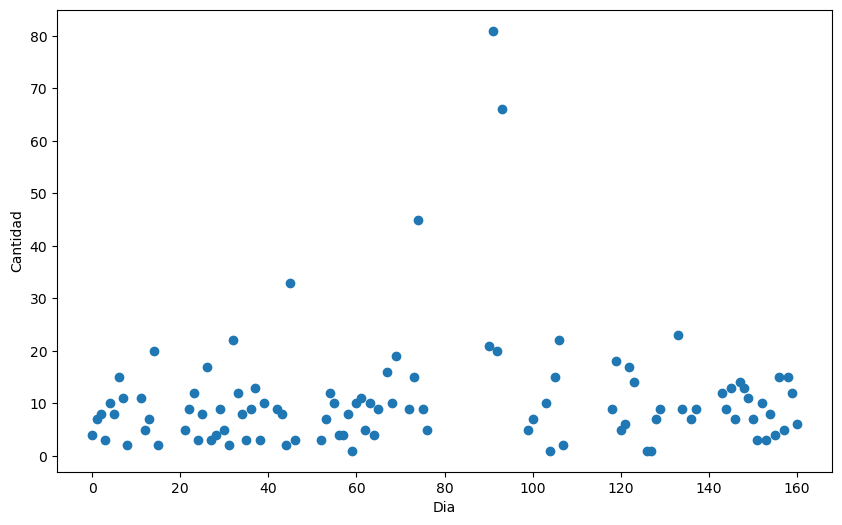

In [27]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=k.Dia, y=k.Cantidad)
plt.xlabel('Dia')
plt.ylabel('Cantidad')
plt.show()

Vamos a hacer un *heat map*:

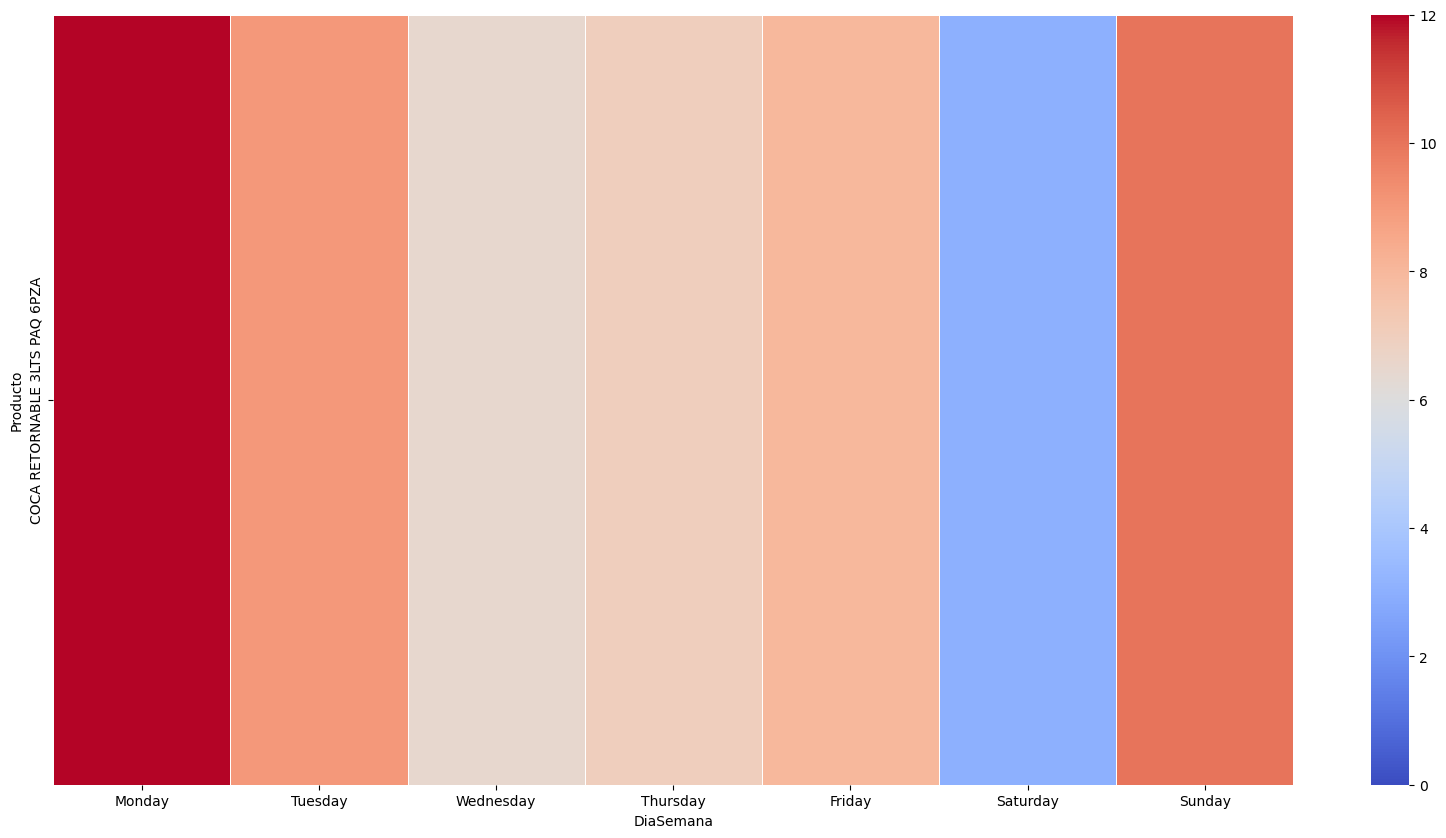

In [25]:
df_day = k.pivot_table(index='Producto', columns='DiaSemana', values='Cantidad', aggfunc='median')
df_day = df_day.reindex(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(20,10))
sns.heatmap(df_day, fmt="d", cmap='coolwarm',linewidths=.5, vmin = 0)
plt.show()

In [26]:
df_day

DiaSemana,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Producto,,,,,,,
COCA RETORNABLE 3LTS PAQ 6PZA,12.0,9.0,6.5,7.0,8.0,3.0,10.0
